In [1]:
# Parameters
# Refer to injected parameters for any run.ipynb (similar cell below)
fname = 'R1158_FKS2-HS1_single_ortho_dox'

In [2]:
# Parameters
fname = "R1158_FKS2-HS2_single_ortho_dox"


# Notebook to generate heatmaps

## Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Specify paths

In [4]:
variantdata_path = 'dimsum_output/variant_data/'
processed_data_outpath = 'processed_data/'
aggdata_outpath = 'aggregated_data/'
heatmapdata_outpath = 'heatmaps_data/'
mgraph_outpath = 'manuscript_figures/'

## Get conditions from filename

In [5]:
f = variantdata_path + fname
pos_offset = {'FKS1-HS1': 639,
              'FKS1-HS2': 1353,
              'FKS2-HS1': 659,
              'FKS2-HS2': 1372
             }

In [6]:
cset = f.split('/')[-1].split('_') # Extract conditions from parameter
cset_name = '_'.join(cset) # Basename based on conditions
strain, locus, pool_type, compound = [cset[i] for i in (0,1,2,-1)]
print(f'Strain: {strain}')
print(f'Locus: {locus}')
print(f'Pool type: {pool_type}')
print(f'Compound: {compound}')

Strain: R1158
Locus: FKS2-HS2
Pool type: single
Compound: dox


## Import dataframe

In [7]:
withSyndf = pd.read_csv(processed_data_outpath+cset_name+'/selcoeff_all_libraries.csv', index_col=0)
wtaa = withSyndf.loc[withSyndf.WT == True, 'aa_seq'].values[0]
withSyndf

,seq_type,nt_seq,aa_pos,alt_codons,mutated_codon,combination,aa_seq,WT,STOP,STOP_readthrough,...,b3_log10,alt_aa,mutation_type,Log2FC_1,Log2FC_2,Log2FC_3,selcoeff_1,selcoeff_2,selcoeff_3,median_s
0,single,ttttgggtgagacgttatacactc,0.0,ttt,1.0,NaN,FWVRRYTL,NaN,False,False,...,-1.837866,F,non-synonymous,-0.014077,0.011798,-0.009422,-0.068688,-0.040911,-0.078628,-0.068688
1,single,ttgtgggtgagacgttatacactc,0.0,ttg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-1.606574,L,non-synonymous,0.055261,0.084978,0.046891,0.000650,0.032269,-0.022315,0.000650
2,single,atgtgggtgagacgttatacactc,0.0,atg,1.0,NaN,MWVRRYTL,NaN,False,False,...,-2.611099,M,non-synonymous,0.051484,0.044528,0.114710,-0.003126,-0.008180,0.045504,-0.003126
3,single,gtttgggtgagacgttatacactc,0.0,gtt,1.0,NaN,VWVRRYTL,NaN,False,False,...,-2.334202,V,non-synonymous,0.036161,0.074488,0.113366,-0.018450,0.021779,0.044160,0.021779
4,single,gtgtgggtgagacgttatacactc,0.0,gtg,1.0,NaN,VWVRRYTL,NaN,False,False,...,-2.454001,V,non-synonymous,0.048917,0.079007,0.130517,-0.005694,0.026298,0.061311,0.026298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,WT,gattgggtgagacgttatacactc,3.0,aga,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
572,WT,gattgggtgagacgttatacactc,4.0,cgt,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
573,WT,gattgggtgagacgttatacactc,5.0,tat,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,Y,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
574,WT,gattgggtgagacgttatacactc,6.0,aca,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,T,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614


## Reshape dataframe

In [8]:
if pool_type == 'single':
    withWTdf = withSyndf[withSyndf.seq_type.isin(['WT','single'])]
else:
    withWTdf = withSyndf[withSyndf.Nham_aa <=1]
withWTdf

,seq_type,nt_seq,aa_pos,alt_codons,mutated_codon,combination,aa_seq,WT,STOP,STOP_readthrough,...,b3_log10,alt_aa,mutation_type,Log2FC_1,Log2FC_2,Log2FC_3,selcoeff_1,selcoeff_2,selcoeff_3,median_s
0,single,ttttgggtgagacgttatacactc,0.0,ttt,1.0,NaN,FWVRRYTL,NaN,False,False,...,-1.837866,F,non-synonymous,-0.014077,0.011798,-0.009422,-0.068688,-0.040911,-0.078628,-0.068688
1,single,ttgtgggtgagacgttatacactc,0.0,ttg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-1.606574,L,non-synonymous,0.055261,0.084978,0.046891,0.000650,0.032269,-0.022315,0.000650
2,single,atgtgggtgagacgttatacactc,0.0,atg,1.0,NaN,MWVRRYTL,NaN,False,False,...,-2.611099,M,non-synonymous,0.051484,0.044528,0.114710,-0.003126,-0.008180,0.045504,-0.003126
3,single,gtttgggtgagacgttatacactc,0.0,gtt,1.0,NaN,VWVRRYTL,NaN,False,False,...,-2.334202,V,non-synonymous,0.036161,0.074488,0.113366,-0.018450,0.021779,0.044160,0.021779
4,single,gtgtgggtgagacgttatacactc,0.0,gtg,1.0,NaN,VWVRRYTL,NaN,False,False,...,-2.454001,V,non-synonymous,0.048917,0.079007,0.130517,-0.005694,0.026298,0.061311,0.026298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,WT,gattgggtgagacgttatacactc,3.0,aga,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
572,WT,gattgggtgagacgttatacactc,4.0,cgt,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
573,WT,gattgggtgagacgttatacactc,5.0,tat,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,Y,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614
574,WT,gattgggtgagacgttatacactc,6.0,aca,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,T,synonymous,0.079061,0.071323,0.068847,0.024450,0.018614,-0.000359,0.018614


### Import validation mutants missing from the dataset (only for BY FKS1-HS1)

In [9]:
rescued_df = pd.read_csv(f'{aggdata_outpath}/validation_DMS_missing_estimates.csv', index_col=0)[['genotype','compound','estimated_s']]
rescued_df.head(8)

,genotype,compound,estimated_s
8,F639C,anidulafungin,2.009071
9,F639C,caspofungin,1.918283
10,F639C,micafungin,1.941420
11,F639C,none,0.122445
32,L640D,anidulafungin,-0.011160
33,L640D,caspofungin,-0.076818
34,L640D,micafungin,0.706536
35,L640D,none,0.060445


### Pivot dataframe

In [10]:
withWTdf_gby = withWTdf.groupby(['alt_aa','aa_pos','nt_seq'])[['median_s']].first().reset_index()

In [11]:
aa_single = withWTdf_gby.groupby(['alt_aa','aa_pos'])[['median_s']].median().reset_index()
aa_single['aa_pos'] = aa_single['aa_pos'].astype(int) + pos_offset[locus]

In [12]:
if (strain == 'BY4741') & (locus == 'FKS1-HS1'):
    rescued_filtered = rescued_df[(rescued_df.compound == compound)
                                  & (rescued_df.genotype.isin(['F639C', 'L640D', 'L642G', 'P647N', 'P647Q']))
                                 ]
    rescued_filtered['wt_aa'], rescued_filtered['aa_pos'], rescued_filtered['alt_aa'] = zip(*rescued_filtered['genotype'].apply(lambda x: [x[0], int(x[1:-1]), x[-1]]))
    rescued_filtered.rename(columns={'estimated_s':'median_s'}, inplace=True)
else:
    rescued_filtered = pd.DataFrame([], columns=['alt_aa','aa_pos','median_s'])

In [13]:
aa_single_complete = pd.concat([aa_single, rescued_filtered[['alt_aa','aa_pos','median_s']]], ignore_index=True)
aa_single_complete.to_csv(f'{heatmapdata_outpath}/{cset_name}.csv')
aa_single_complete

/tmp/ipykernel_3677/1998358398.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aa_single_complete = pd.concat([aa_single, rescued_filtered[['alt_aa','aa_pos','median_s']]], ignore_index=True)


,alt_aa,aa_pos,median_s
0,*,1372,-0.677616
1,*,1373,-0.947858
2,*,1374,-0.534785
3,*,1375,-0.919109
4,*,1376,-1.108709
...,...,...,...
131,Y,1375,-0.101615
132,Y,1376,-0.096583
133,Y,1377,0.018614
134,Y,1378,0.128427


In [14]:
wide_aa = aa_single_complete.pivot(index='alt_aa', columns='aa_pos', values='median_s')

aa_sort_order = '*PGCQNTSEDKHRWYFMLIVA'
aa_sort_dic = dict(zip(list(aa_sort_order), list(range(0,len(aa_sort_order)))))
wide_aa.sort_index(key=lambda x: x.map(aa_sort_dic), inplace=True)
wide_aa

aa_pos,1372,1373,1374,1375,1376,1377,1378,1379
alt_aa,,,,,,,,
*,-0.677616,-0.947858,-0.534785,-0.919109,-1.108709,-1.003124,-0.996232,-1.074878
P,-0.035377,-0.303103,NaN,-0.062930,0.023113,-0.472444,0.134803,0.032163
G,NaN,NaN,NaN,NaN,NaN,0.032563,0.020472,-0.023627
C,NaN,-0.097771,0.007267,-0.060913,-0.131233,0.020512,-1.145824,-0.147783
Q,-0.058505,NaN,-0.046442,-0.082818,-0.098085,-0.001328,-0.172086,0.052265
N,-0.140597,-0.870059,NaN,-0.857663,-0.111818,NaN,-0.038119,-0.021068
T,-0.129149,-0.011215,0.005878,-0.093274,-0.143917,0.009693,-0.003141,NaN
S,-0.059307,-0.040586,-0.002018,-0.078539,-0.263860,-0.019663,0.057021,-0.002827
E,NaN,NaN,-0.006604,NaN,-0.084021,NaN,NaN,NaN


## Draw heatmap

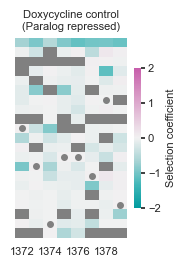

In [15]:
from matplotlib.ticker import MultipleLocator

# Convert conditions to title labels
title_dict = {'none':'Control',
              'dox':'Doxycycline control\n(Paralog repressed)',
              'anidulafungin':'Anidulafungin',
              'caspofungin':'Caspofungin',
              'micafungin':'Micafungin'
             }

# Purge graph space
sns.set(rc = {'figure.figsize':(1.8, 2.6),
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
             },
       style='whitegrid')
f, ax = plt.subplots()

# Custom color palette
ccmap = sns.color_palette("blend:#009B9E,#42B7B9,#A7D3D4,#F1F1F1,#E4C1D9,#D691C1,#C75DAB", # CARTOColors Tropic
                          as_cmap=True)
ccmap.set_bad('.5') # Color for missing values

# Mask for missing values
mask = pd.isnull(wide_aa)

# Draw heatmap
ax = sns.heatmap(wide_aa, mask=mask, 
                 cmap=ccmap,
                 vmin=-2, center=0, vmax=2,
                 #xticklabels=len(wtaa)-1,
                 xticklabels=2,
                 yticklabels=False,
                 cbar_kws={'label':'Selection coefficient',
                           'shrink':.7
                          }
                )

ax.set_title(title_dict[compound])
ax.set(xlabel=None, ylabel=None)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.tick_params(axis='x', length=3)

cax = ax.figure.axes[-1]
cax.tick_params(length=3, pad=2)

# Coordinates of WT protein sequence on the heatmap are extracted from the dataframe
# Coordinates should be OK even if the dataframe contains missing values
wtcoord_aa = [(i+0.5, list(aa_sort_order).index(v)+0.5) for i,v in enumerate(wtaa)]

for o in wtcoord_aa:
    ax.plot(o[0],o[1], marker='o', color='.5', markersize=4) # displays WT sequence

# Variants for which we inferred the DMS score
#estimate_coord = [(a+0.75-pos_offset[locus], list(aa_sort_order).index(b)+0.25) for a, b in zip(rescued_filtered.aa_pos, rescued_filtered.alt_aa)]

#for m in estimate_coord:
#    ax.plot(m[0],m[1], marker='*', color='.5', markersize=2)

# Graphs are output in the specified folder
plt.savefig(mgraph_outpath+cset_name+'_aa_heatmap_median_s.svg', format='svg', dpi=300)